In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
features=list(dataset.columns[:8])
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, 8].values

In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', splitter='best',random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
y_pred_class = classifier.predict(X_test)

In [35]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6894308943089431


In [14]:
1 - y_test.mean()

0.6597222222222222

In [15]:
y_test.mean()

0.3402777777777778

In [16]:
print('True:', y_test[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
False: [1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0]


In [17]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[284  96]
 [ 83 113]]


In [18]:
from sklearn.tree.export import export_text

r = export_text(classifier, feature_names=features)
print(r)



|--- Glucose <= 0.07
|   |--- Age <= -0.65
|   |   |--- BMI <= 1.65
|   |   |   |--- BMI <= 0.13
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  0.13
|   |   |   |   |--- BMI <= 0.20
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BMI >  0.20
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.54
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.54
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.61
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.61
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- BMI >  1.65
|   |   |   |--- BloodPressure <= 1.19
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  1.19
|   |   |   |   |--- class: 0
|   |--- Age >  -0.65
|   |   |--- Insulin <= 1.03
|   |   |   |--- DiabetesPedigreeFunction <= -0.87
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  -0.87
|   |   |   |   |--- BloodPressure <

C:\Users\Afraz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
classifier = tree.DecisionTreeClassifier(criterion = 'gini', splitter='best',random_state = 0)

In [22]:
classifier=classifier.fit(X,y)

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, 'tree.dot', feature_names =features)

In [27]:
! dot -Tpng tree.dot -o tree.png

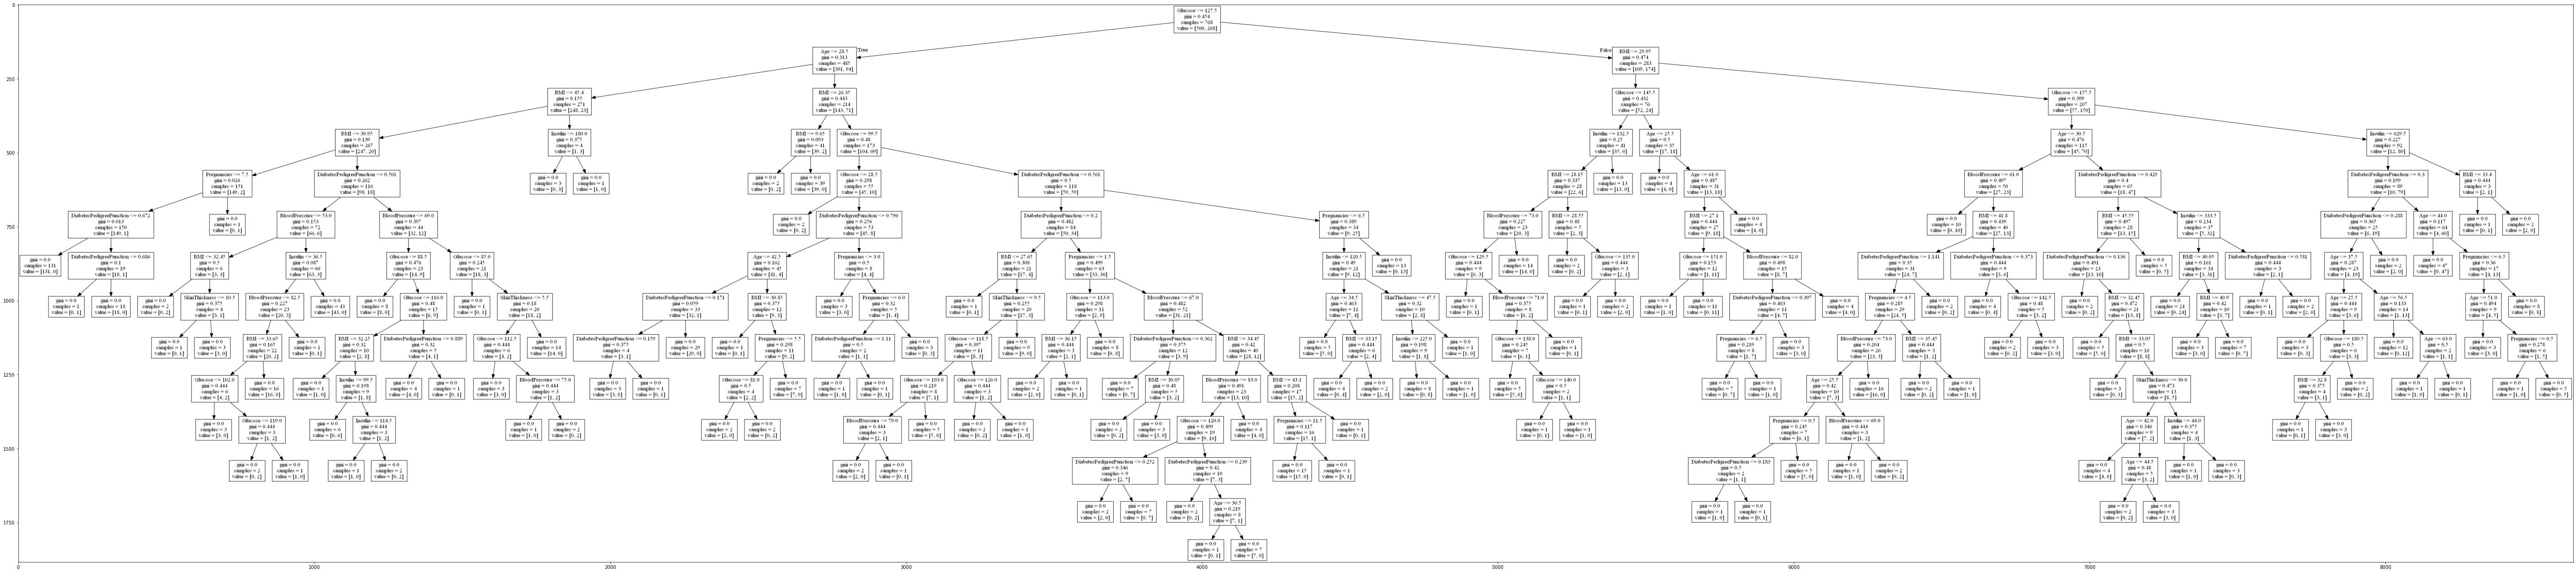

In [30]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (100, 100))
plt.imshow(img)